In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sea
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

Data is obtained from the following site:
https://www.kaggle.com/kaushiksuresh147/customer-segmentation

### Read Data and Make Sense of It

In [2]:
auto1 = pd.read_csv("/Users/owner/Desktop/DS_AI_projects/Customer segmentation project/Train.csv")

In [3]:
auto2 = pd.read_csv("/Users/owner/Desktop/DS_AI_projects/Customer segmentation project/Test.csv")

In [4]:
automobile = pd.concat([auto1, auto2])
automobile.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [5]:
automobile.describe()

,ID,Age,Work_Experience,Family_Size
count,10695.000000,10695.000000,9597.000000,10247.000000
mean,463468.088640,43.511828,2.619777,2.844052
std,2600.966411,16.774158,3.390790,1.536427
min,458982.000000,18.000000,0.000000,1.000000
25%,461220.500000,30.000000,0.000000,2.000000
50%,463451.000000,41.000000,1.000000,3.000000
75%,465733.500000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


### Imputation, Filling Missing Values, One Hot Encoding 

In [6]:
automobile.columns = ['id', 'gender', 'married', 'age', 'graduated', 'profession',
       'work_experience', 'spending_score', 'family_size', 'var_1',
       'segmentation']

In [7]:
automobile = automobile.drop(columns=["id", "segmentation"])
automobile.head()

,gender,married,age,graduated,profession,work_experience,spending_score,family_size,var_1
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6


In [8]:
# treating numerical features of null values with mean values
automobile.fillna(automobile[["age", "work_experience", "family_size"]].mean(), inplace=True)

In [9]:
for c in automobile.columns:
    a = automobile[c].value_counts()
    print(a)

Male      5841
Female    4854
Name: gender, dtype: int64
Yes    6163
No     4342
Name: married, dtype: int64
35    321
42    320
37    304
43    301
40    300
     ... 
75     37
78     36
76     36
80     33
85     32
Name: age, Length: 67, dtype: int64
Yes    6570
No     4023
Name: graduated, dtype: int64
Artist           3318
Healthcare       1750
Entertainment    1250
Engineer          935
Doctor            930
Lawyer            844
Executive         775
Marketing         403
Homemaker         328
Name: profession, dtype: int64
1.000000     3127
0.000000     3087
2.619777     1098
9.000000      613
8.000000      612
2.000000      373
4.000000      346
3.000000      337
5.000000      270
6.000000      265
7.000000      256
14.000000      66
10.000000      64
11.000000      64
12.000000      60
13.000000      57
Name: work_experience, dtype: int64
Low        6494
Average    2599
High       1602
Name: spending_score, dtype: int64
2.000000    3158
1.000000    1965
3.000000    1952
4.00

In [10]:
automobile.isnull().sum()

gender               0
married            190
age                  0
graduated          102
profession         162
work_experience      0
spending_score       0
family_size          0
var_1              108
dtype: int64

In [11]:
# binary encoding for categorical features with only 2 possible values.

# dict = {# some kind of dictionary with categorical keys mapping to numerical values}
# df['feature'] = df['feature'].map(dict)

In [12]:
# one-hot encoding for categorical features with 2 or more possible values.
automobiles = pd.get_dummies(automobile, prefix = ['profession'], columns = ['profession'])
automobiles = pd.get_dummies(automobiles, prefix = ['gender'], columns = ['gender'])
automobiles = pd.get_dummies(automobiles, prefix = ['married'], columns = ['married'])
automobiles = pd.get_dummies(automobiles, prefix = ['graduated'], columns = ['graduated'])
automobiles = pd.get_dummies(automobiles, prefix = ['var_1'], columns = ['var_1'])
automobiles.head(10)

,age,work_experience,spending_score,family_size,profession_Artist,profession_Doctor,profession_Engineer,profession_Entertainment,profession_Executive,profession_Healthcare,...,married_Yes,graduated_No,graduated_Yes,var_1_Cat_1,var_1_Cat_2,var_1_Cat_3,var_1_Cat_4,var_1_Cat_5,var_1_Cat_6,var_1_Cat_7
0,22,1.000000,Low,4.0,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
1,38,2.619777,Average,3.0,0,0,1,0,0,0,...,1,0,1,0,0,0,1,0,0,0
2,67,1.000000,Low,1.0,0,0,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0
3,67,0.000000,High,2.0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
4,40,2.619777,High,6.0,0,0,0,1,0,0,...,1,0,1,0,0,0,0,0,1,0
5,56,0.000000,Average,2.0,1,0,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0
6,32,1.000000,Low,3.0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
7,33,1.000000,Low,3.0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
8,61,0.000000,Low,3.0,0,0,1,0,0,0,...,1,0,1,0,0,0,0,0,0,1
9,55,1.000000,Average,4.0,1,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [13]:
automobiles.drop(columns=["gender_Male"], inplace=True)

In [14]:
# Ordincal feature encoding for features that have ordered values
from sklearn.preprocessing import LabelEncoder

#label encoder can't handle missing values
automobiles['spending_score'] = automobiles['spending_score'].fillna('None')
# Label encode ord_1 feature
label_encoder = LabelEncoder()
automobiles['spending_score'] = label_encoder.fit_transform(automobiles['spending_score'])
# Print sample of dataset
automobiles.head(10)

,age,work_experience,spending_score,family_size,profession_Artist,profession_Doctor,profession_Engineer,profession_Entertainment,profession_Executive,profession_Healthcare,...,married_Yes,graduated_No,graduated_Yes,var_1_Cat_1,var_1_Cat_2,var_1_Cat_3,var_1_Cat_4,var_1_Cat_5,var_1_Cat_6,var_1_Cat_7
0,22,1.000000,2,4.0,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
1,38,2.619777,0,3.0,0,0,1,0,0,0,...,1,0,1,0,0,0,1,0,0,0
2,67,1.000000,2,1.0,0,0,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0
3,67,0.000000,1,2.0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
4,40,2.619777,1,6.0,0,0,0,1,0,0,...,1,0,1,0,0,0,0,0,1,0
5,56,0.000000,0,2.0,1,0,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0
6,32,1.000000,2,3.0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
7,33,1.000000,2,3.0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
8,61,0.000000,2,3.0,0,0,1,0,0,0,...,1,0,1,0,0,0,0,0,0,1
9,55,1.000000,0,4.0,1,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [15]:
# feature standardization
scaler = StandardScaler().fit(automobiles)
scaled_features = scaler.transform(automobiles)
scaled_features = pd.DataFrame(scaled_features, columns = automobiles.columns)
scaled_features.head()

,age,work_experience,spending_score,family_size,profession_Artist,profession_Doctor,profession_Engineer,profession_Entertainment,profession_Executive,profession_Healthcare,...,married_Yes,graduated_No,graduated_Yes,var_1_Cat_1,var_1_Cat_2,var_1_Cat_3,var_1_Cat_4,var_1_Cat_5,var_1_Cat_6,var_1_Cat_7
0,-1.282499,-0.504312,0.750575,0.768669,-0.670654,-0.308607,-0.309514,-0.363793,-0.279508,2.260847,...,-1.166141,1.287814,-1.262033,-0.125946,-0.235726,-0.3367,2.500169,-0.103798,-1.351158,-0.160627
1,-0.328606,0.000000,-1.610424,0.103701,-0.670654,-0.308607,3.230867,-0.363793,-0.279508,-0.442312,...,0.857529,-0.776510,0.792372,-0.125946,-0.235726,-0.3367,2.500169,-0.103798,-1.351158,-0.160627
2,1.400325,-0.504312,0.750575,-1.226237,-0.670654,-0.308607,3.230867,-0.363793,-0.279508,-0.442312,...,0.857529,-0.776510,0.792372,-0.125946,-0.235726,-0.3367,-0.399973,-0.103798,0.740106,-0.160627
3,1.400325,-0.815659,-0.429925,-0.561268,-0.670654,-0.308607,-0.309514,-0.363793,-0.279508,-0.442312,...,0.857529,-0.776510,0.792372,-0.125946,-0.235726,-0.3367,-0.399973,-0.103798,0.740106,-0.160627
4,-0.209369,0.000000,-0.429925,2.098607,-0.670654,-0.308607,-0.309514,2.748818,-0.279508,-0.442312,...,0.857529,-0.776510,0.792372,-0.125946,-0.235726,-0.3367,-0.399973,-0.103798,0.740106,-0.160627


### Make a Plot on the "Elbow Method"

Text(0, 0.5, 'Inertia')

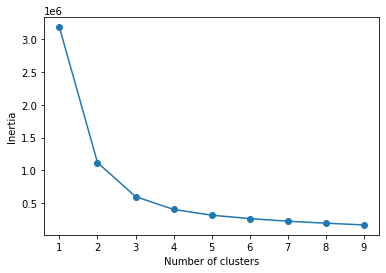

In [16]:
# store the squared sum of distances from the mean of each cluster to the data points to that mean
sse = []

for cluster in range(1,10):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(automobiles)
    sse.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
clustering = pd.DataFrame({'Cluster':range(1,10), 'SSE':sse})
#plt.figure(figsize=(12,6))
plt.plot(clustering['Cluster'], clustering['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [17]:
# based on the elbow method, the best number of clusters to set would be 4, 
# since after K=4, the inertia decreases in a linear manner.

# Build a model with 4 clusters
kmeans = KMeans(n_clusters=4, init='k-means++')
kmeans.fit(automobiles)

# Print the silhouette score for the model above
print(silhouette_score(automobiles, kmeans.labels_, metric='euclidean'))

0.42861278447347173


### Try Improve the Quality of Clusters by Selecting Useful Features

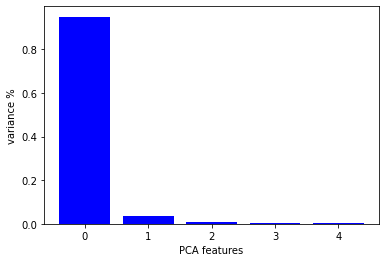

In [18]:
# attempt to improve the model using PCA to reduce dimensionality.
pca = PCA(n_components=5)
pca_fit = pca.fit_transform(automobiles)
n_comp = range(pca.n_components_)
plt.bar(n_comp, pca.explained_variance_ratio_, color='blue')
plt.xlabel('PCA features')
plt.ylabel('variance %')

pca_components = pd.DataFrame(pca_fit)

In [19]:
pca_components.head()

,0,1,2,3,4
0,-21.502903,-2.450373,0.521449,0.782306,-0.633519
1,-5.476260,-0.192459,0.297044,-1.566620,-0.290469
2,23.568221,-0.689226,-1.477698,0.566654,0.225764
3,23.602871,-1.765042,-0.394367,-0.085947,0.124108
4,-3.558898,-0.310606,2.998802,-0.374295,0.823571


Text(0, 0.5, 'Inertia')

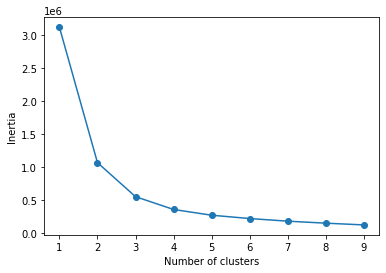

In [20]:
# building a new model after PCA.

inertia = []

for cluster in range(1,10):
    kmeans = KMeans(n_clusters = cluster)
    kmeans.fit(pca_components.iloc[:,:2])
    inertia.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
clusters = pd.DataFrame({'Cluster':range(1,10), 'Inertia':inertia})
# plt.figure(figsize=(12,6))
plt.plot(clusters['Cluster'], clusters['Inertia'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [21]:
# still, K=4 seems like the best approach.
kmeans_new = KMeans(n_clusters=4)
kmeans_new.fit(pca_components.iloc[:,:2])

# silhouette score
print(silhouette_score(pca_components.iloc[:,:2], kmeans_new.labels_, metric='euclidean'))

0.47313464575183084


We see roughly 4.5% increase in the Silhouette score!

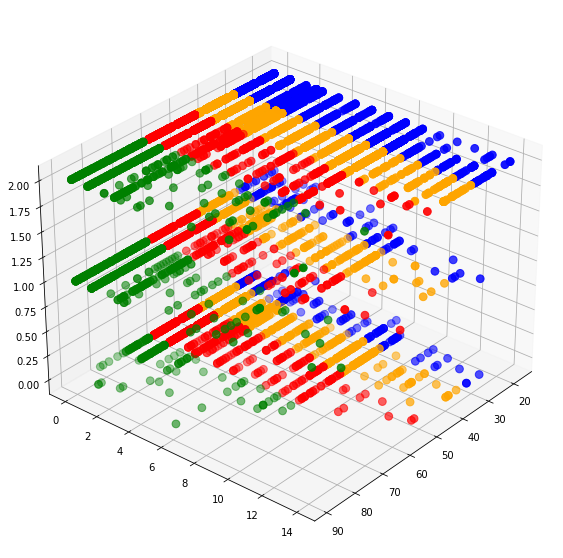

In [22]:
model = KMeans(n_clusters=4)

clusters = model.fit_predict(pca_components.iloc[:,:2])
automobiles["label"] = clusters
 
fig = plt.figure(figsize=(21,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(automobiles.age[automobiles.label == 0], automobiles["work_experience"][automobiles.label == 0], automobiles["spending_score"][automobiles.label == 0], c='blue', s=60)
ax.scatter(automobiles.age[automobiles.label == 1], automobiles["work_experience"][automobiles.label == 1], automobiles["spending_score"][automobiles.label == 1], c='red', s=60)
ax.scatter(automobiles.age[automobiles.label == 2], automobiles["work_experience"][automobiles.label == 2], automobiles["spending_score"][automobiles.label == 2], c='green', s=60)
ax.scatter(automobiles.age[automobiles.label == 3], automobiles["work_experience"][automobiles.label == 3], automobiles["spending_score"][automobiles.label == 3], c='orange', s=60)

ax.view_init(30, 40)
plt.show()

In [23]:
automobiles.columns

Index(['age', 'work_experience', 'spending_score', 'family_size',
       'profession_Artist', 'profession_Doctor', 'profession_Engineer',
       'profession_Entertainment', 'profession_Executive',
       'profession_Healthcare', 'profession_Homemaker', 'profession_Lawyer',
       'profession_Marketing', 'gender_Female', 'married_No', 'married_Yes',
       'graduated_No', 'graduated_Yes', 'var_1_Cat_1', 'var_1_Cat_2',
       'var_1_Cat_3', 'var_1_Cat_4', 'var_1_Cat_5', 'var_1_Cat_6',
       'var_1_Cat_7', 'label'],
      dtype='object')

As you can see, the clusters look like they can be separated quite easily, except a few spots where different colors overlap a bit. As far as the results go, I'm satisfied with the clusters!

### Take a Look at the Demographics

[Text(0.5, 1.0, 'Cluster vs Age')]

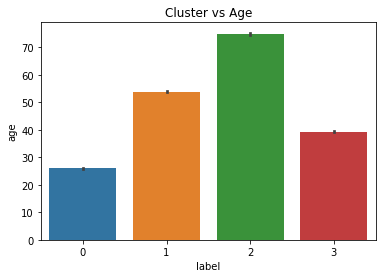

In [24]:
sns.barplot(x='label', y='age', data=automobiles).set(title='Cluster vs Age')

[Text(0.5, 1.0, 'Cluster vs Family Size')]

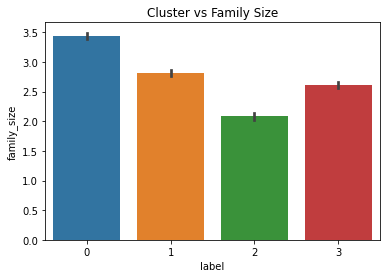

In [25]:
sns.barplot(x='label', y='family_size', data=automobiles).set(title='Cluster vs Family Size')

[Text(0.5, 1.0, 'Cluster vs Spending Score')]

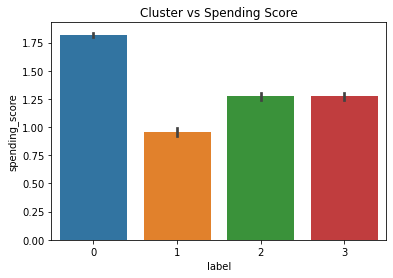

In [26]:
sns.barplot(x='label', y='spending_score', data=automobiles).set(title='Cluster vs Spending Score')

[Text(0.5, 1.0, 'Cluster vs Work Experience')]

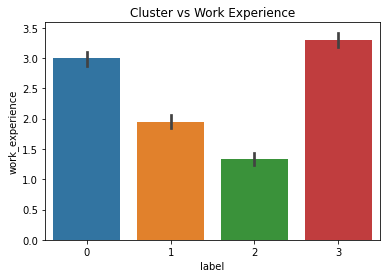

In [27]:
sns.barplot(x='label', y='work_experience', data=automobiles).set(title='Cluster vs Work Experience')

### Now take a look at the count of each cluster

In [28]:
automobile = automobile.fillna('Unknown')
automobile["cluster"] = clusters
automobile.head()

,gender,married,age,graduated,profession,work_experience,spending_score,family_size,var_1,cluster
0,Male,No,22,No,Healthcare,1.000000,Low,4.0,Cat_4,0
1,Female,Yes,38,Yes,Engineer,2.619777,Average,3.0,Cat_4,3
2,Female,Yes,67,Yes,Engineer,1.000000,Low,1.0,Cat_6,2
3,Male,Yes,67,Yes,Lawyer,0.000000,High,2.0,Cat_6,2
4,Female,Yes,40,Yes,Entertainment,2.619777,High,6.0,Cat_6,3


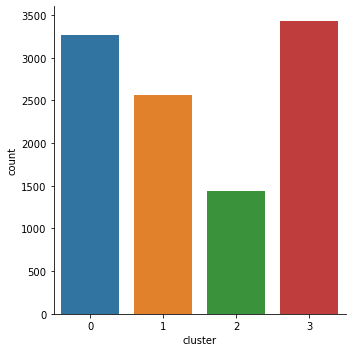

In [29]:
sns.catplot(x="cluster", kind="count", data=automobile)

The above barplots show the following insights:
1. Cluster 1: The averge or typical customer in this cluster is middle-aged (around 40) with an average family size of 2.5 and a moderate ~ moderately high spending score. This customer group has the longest years of work_experience on average. This is the largest customer group. My recommendation to this company is to focus on utility —— advertise versatile models that cater to a variety of driving consitions and preferences to maximize the reach to the largest pool of potential buyers.

2. Cluster 2: The typical customer in this cluster is a senior (over 70) with an average family size of 2 and a moderate ~ moderately high spending score. This is the smallest group and its members should be mostly retired.

3. Cluster 3: The typical customer is a slightly older middle-aged person with an average family size of 2.8 and the lowest spending score out of all groups with a less than 1.0 average. This group won't be able to afford expensive vehicles, probably because it has more family members to spend money on or this group as a whole do not spend beyond their needs. The company's strategy should be to advertise less expensive, mid-to-low tier vehicles.

4. Cluster 4: The typical customer is a young adult aged around 25 who has the highest spending score of all groups and the largest average family size! This is surprising because we normally assume older customers to have more spending power and larger family size, but for this automobile company, this is simply not the case. This cluster is likely a group of young working professionals with high pay and/or heritage. The company should promote the most top-of-the-line car models to this group as their primary target consumer base because this group is most likely able to afford more expensive cars.

In [30]:
automobiles.columns

Index(['age', 'work_experience', 'spending_score', 'family_size',
       'profession_Artist', 'profession_Doctor', 'profession_Engineer',
       'profession_Entertainment', 'profession_Executive',
       'profession_Healthcare', 'profession_Homemaker', 'profession_Lawyer',
       'profession_Marketing', 'gender_Female', 'married_No', 'married_Yes',
       'graduated_No', 'graduated_Yes', 'var_1_Cat_1', 'var_1_Cat_2',
       'var_1_Cat_3', 'var_1_Cat_4', 'var_1_Cat_5', 'var_1_Cat_6',
       'var_1_Cat_7', 'label'],
      dtype='object')

In [31]:
automobiles.groupby("label")["graduated_Yes"].mean()

label
0    0.357340
1    0.771875
2    0.616933
3    0.740017
Name: graduated_Yes, dtype: float64

<Figure size 1440x360 with 0 Axes>

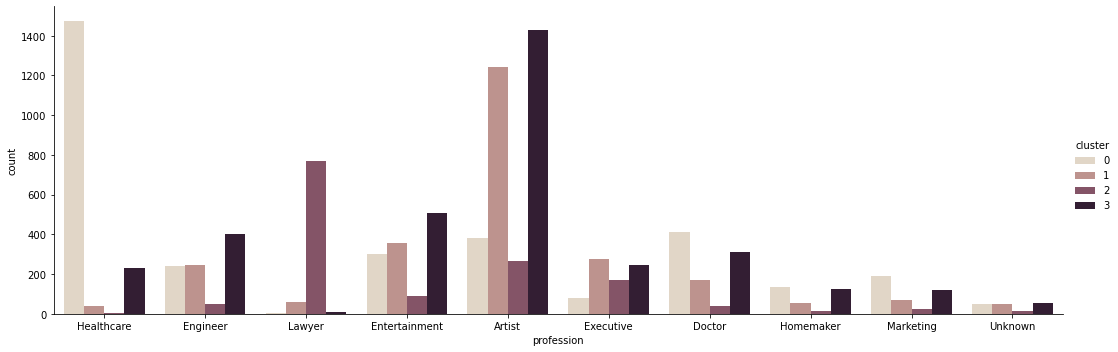

In [32]:
plt.figure(figsize=(20,5))
sns.catplot(x="profession", kind="count", hue='cluster', data=automobile, palette="ch:.25",
            height=5, aspect=3)

We can see the following trends:
1. Artists, entertainment workers, and engineers are most represented in the 1st cluster.
2. Lawyers, artists, and executives are most represented in the 2nd cluster.
3. Artists, entertainment workers, and executives are most represented in the 3rd cluster.
4. Healthcare professionals, doctors, and artists are most represented in the 4th cluster.

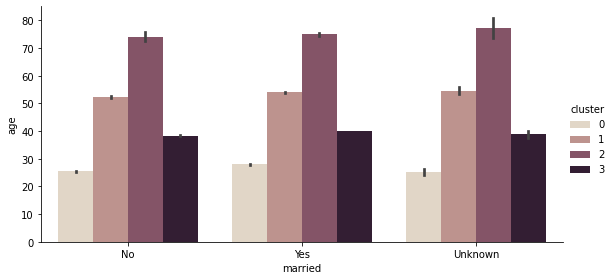

In [33]:
sns.catplot(x="married", y="age", kind="bar", hue='cluster', data=automobile, palette="ch:.25",
            height=4, aspect=2)

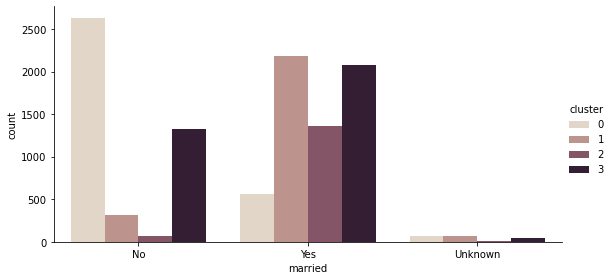

In [34]:
sns.catplot(x="married", kind="count", hue='cluster', data=automobile, palette="ch:.25",
            height=4, aspect=2)

For all clusters except cluster 3 (actually the cluster 4 because python starts counting from 0), there are more married people than unmarried. The last cluster (represented by black) is the young professional group. It's understandable that most of them are unmarried.

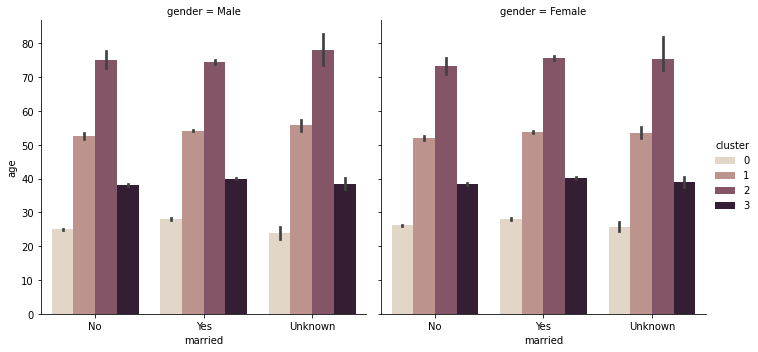

In [35]:
sns.catplot(x="married", y="age", col="gender", kind="bar", hue='cluster', data=automobile, palette="ch:.25")

The charts show that the age for each cluster for unmarried and married people is roughly equivalent. Age for female customers in each cluster is lower than the male counterparts.

In [36]:
automobile["gender"].value_counts()

Male      5841
Female    4854
Name: gender, dtype: int64

In [37]:
print(f"Male to Female Ratio is: {5841/4854}")

Male to Female Ratio is: 1.2033374536464772


### This is the end of the analysis!